# La Crisi della Replicazione {#sec-crisis}

**Prerequisiti**

- Leggi [The Academic Culture of Fraud](https://www.palladiummag.com/2024/08/02/the-academic-culture-of-fraud/).
- Leggi [Why Most Published Research Findings Are False](https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.0020124).
- Leggi [The staggering death toll of scientific lies](https://www.vox.com/future-perfect/368350/scientific-research-fraud-crime-jail-time).

**Concetti e Competenze Chiave**

- La scoperta di frodi e risultati controversi.
- Pratiche di ricerca disoneste e loro conseguenze.
- Il progetto di riproducibilità di Nosek.
- La cultura della frode nel sistema accademico.
- Incentivi accademici distorti.
- Cause profonde della crisi della replicazione.
- Limitazioni dell'approccio frequentista.
- Soluzioni proposte e analisi bayesiana.

**Preparazione del Notebook**

In [40]:
import os
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from cmdstanpy import cmdstan_path, CmdStanModel

# Define directories
home_directory = os.path.expanduser("~")
project_directory = f"{home_directory}/_repositories/psicometria"

# Print project directory to verify
print(f"Project directory: {project_directory}")

Project directory: /Users/corradocaudek/_repositories/psicometria


In [42]:
seed: int = sum(map(ord, "crisis"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

Questo capitolo introduce la crisi di replicazione dei risultati della ricerca in psicologia, esplorando le cause principali di questo fenomeno e mettendo in evidenza il ruolo che l'approccio statistico frequentista ha avuto nel contribuire a questa crisi.

## Feeling the Future 

Il 2011 ha rappresentato un punto di svolta per la comunità scientifica, segnando l'inizio della cosiddetta "crisi della replicazione". Questo fenomeno, pur non influenzando direttamente la vita quotidiana della maggior parte delle persone, inclusi molti psicologi, ha avuto profonde ripercussioni sul mondo della ricerca, specialmente in psicologia, il campo più colpito. Per coloro con una conoscenza anche solo basilare della statistica, e che erano più interessati alla ricerca della verità che all'accumulo di citazioni o all'avanzamento di carriera, il 2011 è stato percepito come un vero e proprio "Anno Zero". Questo momento cruciale ha messo in luce problemi fondamentali nei metodi di ricerca e nell'interpretazione dei risultati, avviando un processo di ripensamento delle pratiche scientifiche che è ancora in corso.

### La Scoperta di Frodi e Risultati Controversi

#### Il Caso Diederik Stapel

Uno dei primi segnali della crisi fu la scoperta della frode scientifica commessa da [Diederik Stapel](https://www.nytimes.com/2013/04/28/magazine/diederik-stapels-audacious-academic-fraud.html), una stella nascente della psicologia sociale e professore presso l'Università di Tilburg nei Paesi Bassi, aveva attirato l'attenzione con una serie di articoli sensazionali: uno suggeriva che mangiare carne rendeva le persone più antisociali; un altro sosteneva che le persone sono più inclini al razzismo se l'ambiente circostante è pieno di rifiuti. Tuttavia, si scoprì che per quegli studi, e molti altri, non aveva mai condotto gli esperimenti né raccolto i dati. Li aveva semplicemente inventati. A volte le frodi accadono. Stapel fu scoperto (alla fine), licenziato e decine dei suoi articoli furono ritirati.

#### Lo Studio "Feeling the Future" di Daryl Bem

Nello stesso anno, Daryl Bem della Cornell University pubblicò uno studio intitolato "Feeling the Future" [@bem2011feeling], che avrebbe scosso ulteriormente le fondamenta della psicologia sociale. Lo studio di Bem si inseriva nella tradizione degli esperimenti di "priming", una tecnica ampiamente utilizzata in psicologia sociale dagli anni '70. Gli esperimenti di priming tipicamente coinvolgevano studenti universitari, remunerati con modeste somme o crediti accademici. I partecipanti venivano esposti a determinati concetti per poi osservare come questi influenzassero il loro comportamento successivo. Un celebre esempio è lo studio di John Bargh del 1996, che dimostrò come l'esposizione a parole associate all'età avanzata inducesse i soggetti a camminare più lentamente [@bargh1996automaticity]. Un altro studio del 2006 rivelò che il priming con concetti legati al denaro rendeva le persone meno propense ad aiutare gli altri. Questi studi sembravano dimostrare una straordinaria malleabilità della mente umana, suggerendo che il nostro comportamento potesse essere inconsciamente manipolato da sottili segnali ambientali. Tuttavia, lo studio di Bem introdusse un elemento nuovo in questo paradigma sperimentale.

Tra i vari esperimenti condotti da Bem, uno in particolare si distingueva. I soggetti venivano esposti a una parola con connotazione positiva o negativa e successivamente dovevano valutare rapidamente la piacevolezza di alcune immagini. Fin qui, nulla di insolito. La svolta radicale consisteva nel fatto che in metà delle prove, il priming avveniva *dopo* che i soggetti avevano già visto e valutato l'immagine [@bem2011feeling].

Sorprendentemente, i risultati mostravano che il priming funzionava anche in queste condizioni: i partecipanti erano più veloci a giudicare piacevoli le immagini quando *successivamente* venivano esposti a una parola positiva. Questo effetto risultava statisticamente significativo, con un p-value di 0.01, sufficiente secondo gli standard correnti per rifiutare l'ipotesi nulla.

Bem interpretò questi risultati come prova della chiaroveggenza, una conclusione che suscitò notevoli controversie e ridicolizzò la psicologia. Gli altri otto esperimenti dello studio, tutti basati su classici paradigmi della psicologia sociale con l'ordine temporale invertito, mostrarono risultati altrettanto significativi.

Questi risultati ponevano la comunità scientifica di fronte a un dilemma: accettare l'esistenza di fenomeni paranormali o mettere in discussione le pratiche statistiche e metodologiche consolidate nella disciplina. Bem stesso continua a sostenere la validità dei suoi risultati come prova dell'esistenza di capacità precognitive.

## Pratiche di Ricerca Disoneste e Loro Conseguenze

Lo studio di Bem, che portava a conclusioni insensate, si rivelò un catalizzatore per un esame critico delle pratiche di ricerca in psicologia, innescando un dibattito che avrebbe avuto profonde ripercussioni sull'intera disciplina [@ritchie2012failing].

Già nel 2005, John Ioannidis dell'Università di Stanford aveva previsto la crisi imminente nel suo articolo "Why Most Published Research Findings Are False" [@ioannidis2005most]. Il nucleo della critica di Ioannidis riguardava l'approccio interpretativo dei dati sperimentali. Secondo la sua analisi, il problema fondamentale risiedeva nel fatto che molti scienziati non valutavano correttamente la probabilità che la loro ipotesi fosse vera alla luce dei dati raccolti. Al contrario, seguendo l'approccio tradizionale ispirato ai lavori di Bernoulli e Fisher, si concentravano sulla probabilità di ottenere i dati osservati nell'ipotesi che la loro teoria fosse falsa.

### P-hacking e HARKing

La psicologia, come molte altre discipline scientifiche, si trova spesso a confrontarsi con le "questionable research practices" (pratiche di ricerca discutibili), ovvero quell'insieme di comportamenti o azioni adottate dai ricercatori durante il processo di conduzione e comunicazione della ricerca scientifica che possono compromettere l'integrità e l'affidabilità dei risultati ottenuti. Queste pratiche includono il "P-hacking", in cui i ricercatori manipolano i dati o le analisi statistiche per ottenere risultati significativi; il "HARKing" (Hypothesizing After Results are Known), in cui le ipotesi vengono formulate retrospettivamente per adattarsi ai risultati ottenuti; e la "presentazione selettiva dei risultati", dove vengono presentati solo i risultati che supportano le ipotesi, tralasciando quelli non significativi o contraddittori.

La pressione per ottenere risultati "statisticamente significativi", insieme all'uso di campioni di piccole dimensioni, porta alla proliferazione di falsi positivi come conseguenza dell'adozione di pratiche di ricerca discutibili. Simmons, Nelson e Simonsohn hanno dimostrato come, attraverso l'impiego di tali pratiche, sia semplice ottenere risultati statisticamente significativi [@nelson2018psychology].

L'uso di queste pratiche è molto diffuso nella ricerca e l'approccio statistico frequentista è particolarmente vulnerabile a tali manipolazioni.

## La Cultura della Frode nel Sistema Accademico

Il sistema accademico stesso, con i suoi incentivi alla pubblicazione e al finanziamento, incoraggia indirettamente queste pratiche.

### Il Caso Brian Wansink

Un caso emblematico è quello di Brian Wansink, ex ricercatore di spicco alla Cornell University, che ricevette cospicui finanziamenti federali durante l'amministrazione Obama. I suoi studi sul comportamento alimentare, come quello sugli uomini che mangiano di più in presenza di donne o sull'effetto dei nomi "attraenti" dati alle verdure sul consumo da parte dei bambini, attirarono grande attenzione mediatica ma si rivelarono in seguito non replicabili. Le conseguenze per Wansink furono severe: diciotto suoi articoli furono ritirati, sette ricevettero "espressioni di preoccupazione", e quindici furono corretti. Nel 2019, Wansink si dimise da Cornell dopo essere stato giudicato colpevole di cattiva condotta scientifica.

### Il Caso Sylvain Lesné

Un altro esempio rilevante riguarda Sylvain Lesné e i suoi coautori che, nel 2006, pubblicarono su Nature [un importante articolo](https://www.nature.com/articles/s41586-024-07691-8) sul morbo di Alzheimer. Questo lavoro era fondamentale per lo sviluppo dell'ipotesi amiloide, un meccanismo proposto per spiegare come la malattia affligge le sue vittime. La ricerca sulla malattia di Alzheimer, che colpisce oltre 50 milioni di persone nel mondo, ha ricevuto oltre un miliardo di dollari in finanziamenti governativi fino al 2022, incoraggiata da studi come quello di Lesné.

Nel 2022, il neuroscienziato Matthew Schrag scoprì immagini manipolate in questo e in molti altri articoli di Lesné, inclusi quelli che sostenevano l'ipotesi amiloide. Le immagini erano state manualmente modificate e accorpate per mostrare falsamente supporto alle ipotesi degli articoli. Queste frodi passarono inosservate attraverso i processi di peer review formali di Nature e di altre sei riviste accademiche, venendo infine scoperte solo tramite canali non ufficiali.

Le conseguenze di queste scoperte furono lente e frammentarie. Gli altri coautori dell'articolo del 2006 alla fine accettarono di ritirarlo, ma non Lesné stesso. La lentezza della risposta a queste evidenze di frode, e il fatto che Lesné continui a essere finanziato dal National Institutes of Health e impiegato presso l'Università del Minnesota, dimostra un fallimento sistemico nell'affrontare la cattiva condotta scientifica.

### Altri Casi di Rilievo

Ho controllato il contenuto e ho notato che ci sono effettivamente alcune ripetizioni e inconsistenze. Hai ragione nel sospettare che i casi di Dan Ariely e Francesca Gino siano stati trattati separatamente, mentre in realtà sono parte dello stesso scandalo. Inoltre, il caso di Marc Tessier-Lavigne è menzionato due volte. Ecco una versione riscritta e migliorata del testo:

Nel mondo accademico, recenti scandali hanno messo in luce il problema della frode scientifica e le sue conseguenze spesso limitate per i responsabili. Ecco alcuni casi emblematici:

1. [Marc Tessier-Lavigne](https://www.science.org/content/article/stanford-president-to-step-down-despite-probe-exonerating-him-of-research-misconduct), ex presidente della Stanford University: Nel 2023, fu costretto a dimettersi dopo la rivelazione di dati falsificati in sue ricerche precedenti presso Genentech. Nonostante lo scandalo, Tessier-Lavigne ha subito conseguenze minime, diventando successivamente CEO di una nuova azienda di ricerca farmacologica. Lo scandalo fu portato alla luce grazie all'indagine condotta da Theo Baker, uno studente diciassettenne di Stanford.

2. Dan Ariely e Francesca Gino: Questi due rinomati psicologi, noti per le loro ricerche sulla disonestà e il comportamento non etico, sono stati coinvolti in uno scandalo di frode scientifica. 
   - Dan Ariely, nel 2021, fu implicato nella fabbricazione di dati in [un articolo del 2012](https://www.newyorker.com/magazine/2023/10/09/they-studied-dishonesty-was-their-work-a-lie) sulla disonestà. 
   - Francesca Gino, docente presso la Harvard Business School, è stata [accusata](https://www.npr.org/2023/06/26/1184289296/harvard-professor-dishonesty-francesca-gino) di aver presentato lavori contenenti risultati falsificati. Il sito del Dipartimento ora riporta che è in "administrative leave".

L'inefficacia delle istituzioni accademiche nel gestire la frode scientifica riflette una corruzione culturale sistemica. Gli incentivi attuali favoriscono la pubblicazione di risultati positivi e innovativi, spesso a scapito dell'integrità scientifica. Gli studiosi che resistono a queste pressioni rischiano di essere emarginati, mentre chi adotta pratiche discutibili per ottenere risultati desiderati viene spesso premiato con finanziamenti, promozioni e prestigio accademico. In sintesi, la crisi della riproducibilità e la cultura della frode sono problemi diffusi e profondamente radicati nel mondo accademico. 

## Il Progetto di Riproducibilità

### L'Iniziativa di Brian Nosek

Nel 2011, Brian Nosek dell'Università della Virginia avviò il Progetto di Riproducibilità [@open2015estimating], coinvolgendo 270 ricercatori nel tentativo di replicare cento studi di psicologia. L'obiettivo era ripetere gli esperimenti originali, utilizzando gli stessi metodi ma con nuovi campioni, per verificare la solidità e la replicabilità dei risultati precedentemente pubblicati.

I risultati di questo imponente lavoro, pubblicati nel 2015, furono a dir poco sconvolgenti. Dei cento studi esaminati, ben novantasette avevano inizialmente riportato risultati statisticamente significativi. Tuttavia, il team di Nosek riuscì a replicare questi risultati solo in trentasei casi. Non solo: le dimensioni degli effetti nelle replicazioni risultarono, in media, dimezzate rispetto agli studi originali. Inoltre, più della metà di queste dimensioni degli effetti cadeva al di fuori degli intervalli di confidenza al 95% riportati nei lavori originali.

### Studi Successivi 

Questi risultati sono stati ulteriormente corroborati da numerosi studi successivi, tra cui una ricerca più recente basata su tecniche di machine learning, che ha esaminato studi di psicologia pubblicati in sei importanti riviste nell'arco di vent'anni. Questa ricerca suggerisce che poco più della metà di questi articoli di psicologia non supererebbe i test di replicazione [@youyou2023discipline]. Discipline come la psicologia sociale sono state oggetto di particolare preoccupazione, con un tasso di replicazione del solo 25% riportato dal Progetto di Riproducibilità [@open2015estimating]. Questo dato è in linea con il lavoro di @youyou2023discipline, che ha mostrato come la replicabilità degli articoli di psicologia vari considerevolmente per sottocampo, con la psicologia sociale che mostra un tasso di replicazione stimato del 37%, un risultato leggermente più incoraggiante rispetto a quanto riportato in precedenza, ma ancora tra i più bassi dei sottocampi esaminati. Altri settori come la psicologia dello sviluppo, cognitiva e clinica hanno mostrato tassi di replicazione stimati rispettivamente del 36%, 42% e 44%, mentre aree come la psicologia delle organizzazioni e della personalità hanno mostrato tassi leggermente più incoraggianti (50% e 55%, rispettivamente). Complessivamente, le evidenze suggeriscono che le preoccupazioni diffuse sulla robustezza e replicabilità dei risultati della ricerca psicologica siano fondate. Sebbene il problema non sia limitato esclusivamente alla psicologia, le questioni rilevate in questo campo hanno ricevuto notevole attenzione a causa dell'apparente portata del fenomeno.

Questi risultati confermavano in modo drammatico le previsioni formulate anni prima da John Ioannidis e Dennis Lindley. Le loro avvertenze riguardo alla possibilità che una larga parte, se non la maggioranza, dei risultati scientifici pubblicati potesse essere falsa, si rivelavano ora profetiche.

Il Progetto di Riproducibilità di Nosek ha segnato un punto di svolta nel dibattito sulla crisi della replicazione in psicologia e, più in generale, nelle scienze sociali e biomediche. Ha evidenziato non solo la fragilità di molti risultati ritenuti consolidati, ma anche la necessità di un riesame critico delle pratiche di ricerca e pubblicazione scientifica. Questo ripensamento delle metodologie scientifiche è ancora in atto.

## Cause Profonde della Crisi della Replicazione

La crisi della replicazione in psicologia e in altre scienze ha radici profonde e non può essere attribuita esclusivamente a pratiche di ricerca disoneste. Diverse cause immediate sono state identificate, tra cui:

- *Pressione a pubblicare ("publish or perish"):* L'intensa pressione sui ricercatori a pubblicare prolificamente è un fattore importante che può contribuire a molti dei problemi legati alla crisi della replicazione. La cultura del "publish or perish" mette i ricercatori sotto stress continuo per produrre risultati significativi e pubblicarli rapidamente [@gopalakrishna2022prevalence; @grimes2018modelling].
- *Ricerca della novità a ogni costo e incentivi accademici distorti:* La ricerca di risultati innovativi e il valore eccessivo attribuito alle scoperte significative incentivano pratiche di ricerca distorte. Questo include la sovrarappresentazione dei risultati positivi e la mancanza di rigore metodologico [@ferguson2012vast; @ware2015significance].
- *Bassa potenza statistica e scarsità di sforzi di replicazione:* Molti studi soffrono di bassa potenza statistica, il che rende difficile ottenere risultati affidabili. Inoltre, la mancanza di sforzi di replicazione contribuisce a mantenere e diffondere risultati non replicabili.
- *Mancanza di trasparenza nella reportistica:* La reportistica selettiva e la flessibilità non dichiarata nei metodi e nei dati sono pratiche comuni che compromettono l'integrità scientifica. Inoltre, la riluttanza a condividere dati e materiali e il bias di pubblicazione, per cui i risultati nulli hanno meno probabilità di essere pubblicati rispetto a quelli statisticamente significativi, aggravano il problema [@bruton2020personal; @nosek2012scientific].

### La Probabilità Inversa

Oltre a questi fattori, alcuni studiosi sostengono che la radice della crisi della replicazione sia ancora più profonda e risieda nell'approccio statistico stesso, ampiamente adottato dalla comunità scientifica [@chivers2024everything; @gelman2014statistical; @loken2017measurement]. Questo punto di vista suggerisce che le difficoltà nella replicazione dei risultati non siano solo il prodotto di comportamenti individuali discutibili, ma derivino in larga parte da un'interpretazione e un'applicazione problematica dei metodi statistici. 

Per comprendere meglio questa questione, dobbiamo tornare alle basi della statistica inferenziale. L'approccio frequentista, dominante nella ricerca scientifica, si basa sulle probabilità di campionamento. Questo metodo, che risale a Jakob Bernoulli nel XVIII secolo, calcola la probabilità di osservare certi dati assumendo che una determinata ipotesi sia vera. Il famoso "p-value" è un esempio di questa logica: esso indica la probabilità di ottenere risultati estremi quanto o più estremi di quelli osservati, supponendo che l'ipotesi nulla sia vera.

Tuttavia, questo approccio ha un limite fondamentale: non ci dice direttamente quanto è probabile che la nostra ipotesi sia vera alla luce dei dati raccolti. In altre parole, non fornisce una "probabilità inferenziale", cioè la probabilità che l'ipotesi sia corretta in base ai risultati ottenuti. Qui entra in gioco l'approccio bayesiano. Il teorema di Bayes offre un metodo per calcolare proprio questa probabilità inferenziale. L'approccio bayesiano tiene conto non solo dei dati osservati, ma anche delle conoscenze pregresse (le "prior") relative all'ipotesi in esame.

La differenza tra questi due approcci è cruciale. Mentre il p-value ci dice quanto sono improbabili i nostri dati se l'ipotesi nulla è vera, l'approccio bayesiano ci fornisce la probabilità che la nostra ipotesi sia vera alla luce dei dati raccolti e delle conoscenze precedenti.

### Implicazioni per la Pratica Scientifica

Questa distinzione ha implicazioni profonde per la pratica scientifica. L'uso esclusivo dell'approccio frequentista può portare a sovrastimare la forza delle evidenze a favore di un'ipotesi, specialmente quando si lavora con campioni piccoli o si conducono molti test statistici, come spesso accade in psicologia.

Alcune soluzioni proposte per affrontare la crisi della replicazione includono:

- Abbassare la soglia di significatività statistica, rendendo più difficile dichiarare un risultato "significativo".
- Richiedere la preregistrazione delle ipotesi per prevenire l'HARKing (Hypothesizing After Results are Known).
- Far sì che le riviste accettino gli articoli basandosi sui metodi piuttosto che sui risultati, per evitare il bias verso la pubblicazione di risultati solo "positivi" o "nuovi".

Tuttavia, queste soluzioni, pur utili, non affrontano il problema fondamentale dell'interpretazione delle evidenze statistiche. L'adozione di un approccio bayesiano offre una soluzione più radicale, fornendo un quadro più completo e realistico della forza delle evidenze a favore o contro un'ipotesi scientifica.

## Guardare i Dati

Consideriamo una simulazione, ispirata da @lakens2015challenges, che illustra come una pratica apparentemente innocua, quella di osservare i risultati man mano che vengono raccolti *all'interno dell'approccio frequentista*, possa avere conseguenze enormi sulle conclusioni dello studio, in particolare sulla *probabilità di ottenere un risultato statisticamente significativo*. Nella simulazione seguente, due campioni casuali vengono estratti dalla stessa popolazione normale di partenza. Di conseguenza, l'"ipotesi nulla" è vera: non c'è differenza tra le medie delle popolazioni di partenza. Tuttavia, a causa della variabilità campionaria, si noterà come il p-valore sia fortemente influenzato da ogni singola osservazione aggiunta al campione.

In [36]:
def simulate_t_tests(seed, max_sample_size, mu=0, sigma=1):
    # Imposta il seme per la riproducibilità
    np.random.seed(seed)

    # Intervallo di grandezza campionaria
    sample_sizes = range(2, max_sample_size + 1, 2)
    p_values = []

    # Genera due campioni grandi iniziali da una distribuzione normale
    full_sample1 = np.random.normal(mu, sigma, max_sample_size)
    full_sample2 = np.random.normal(mu, sigma, max_sample_size)

    # Simulazione
    for n in sample_sizes:
        # Estrai sottoinsiemi incrementali dai campioni completi
        sample1 = full_sample1[:n]
        sample2 = full_sample2[:n]

        # Esegui il t-test per il confronto delle medie di due gruppi indipendenti
        t_stat, p_value = ttest_ind(sample1, sample2)
        p_values.append(p_value)

    color_fill = "#b97c7c"
    color_edge = "#8f2727"

    # Crea il grafico del p-valore in funzione della grandezza campionaria
    plt.plot(sample_sizes, p_values, marker="", linestyle="-", color=color_fill)
    plt.axhline(y=0.05, color=color_edge, linestyle="--", label="Significatività a 0.05")
    plt.xlabel("Grandezza Campionaria")
    plt.ylabel("P-valore")
    plt.title("P-valore in funzione della grandezza campionaria")
    plt.legend()
    plt.grid(True)
    plt.show()

Nelle due simulazioni seguenti, osserviamo come il p-valore cambia progressivamente aumentando la dimensione dei campioni casuali da $n = 2$ a $n = 300$. È evidente come il p-valore vari drasticamente con l'aggiunta di nuove osservazioni ai campioni. Si noti inoltre che, per alcune configurazioni dei due campioni, il p-valore può scendere al di sotto della soglia critica di 0.05 per puro caso. Se un ricercatore interrompesse la raccolta dei dati in quel momento, otterrebbe un risultato "statisticamente significativo". Tuttavia, questa simulazione non mostra altro che rumore: i due campioni sono stati estratti dalla stessa popolazione.

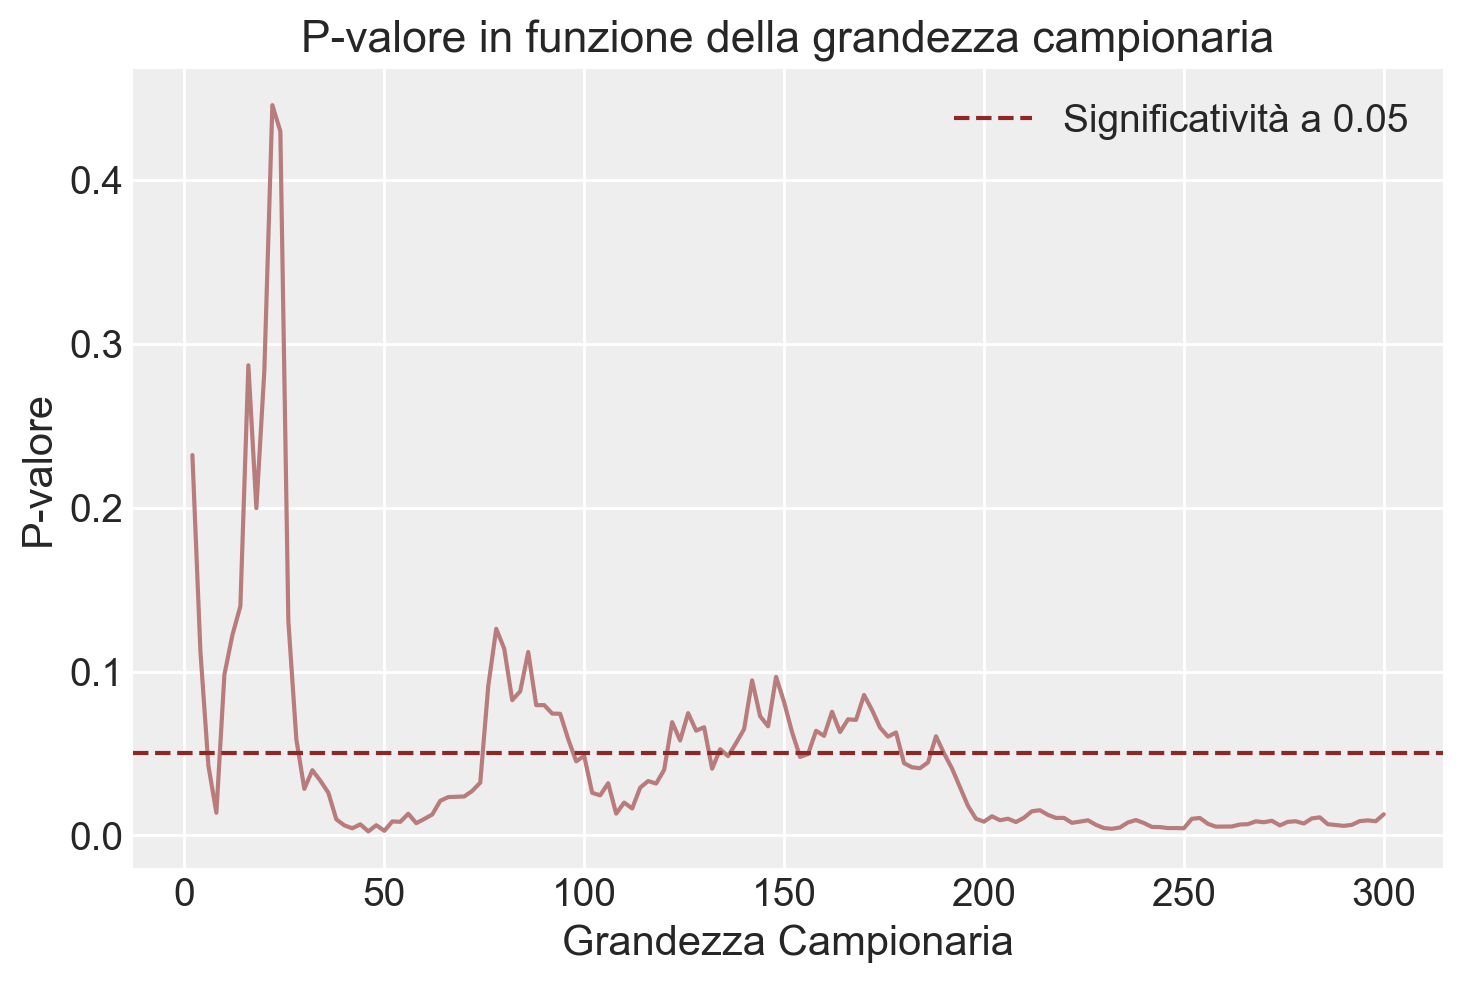

In [37]:
simulate_t_tests(seed=12, max_sample_size=300, mu=0, sigma=2)

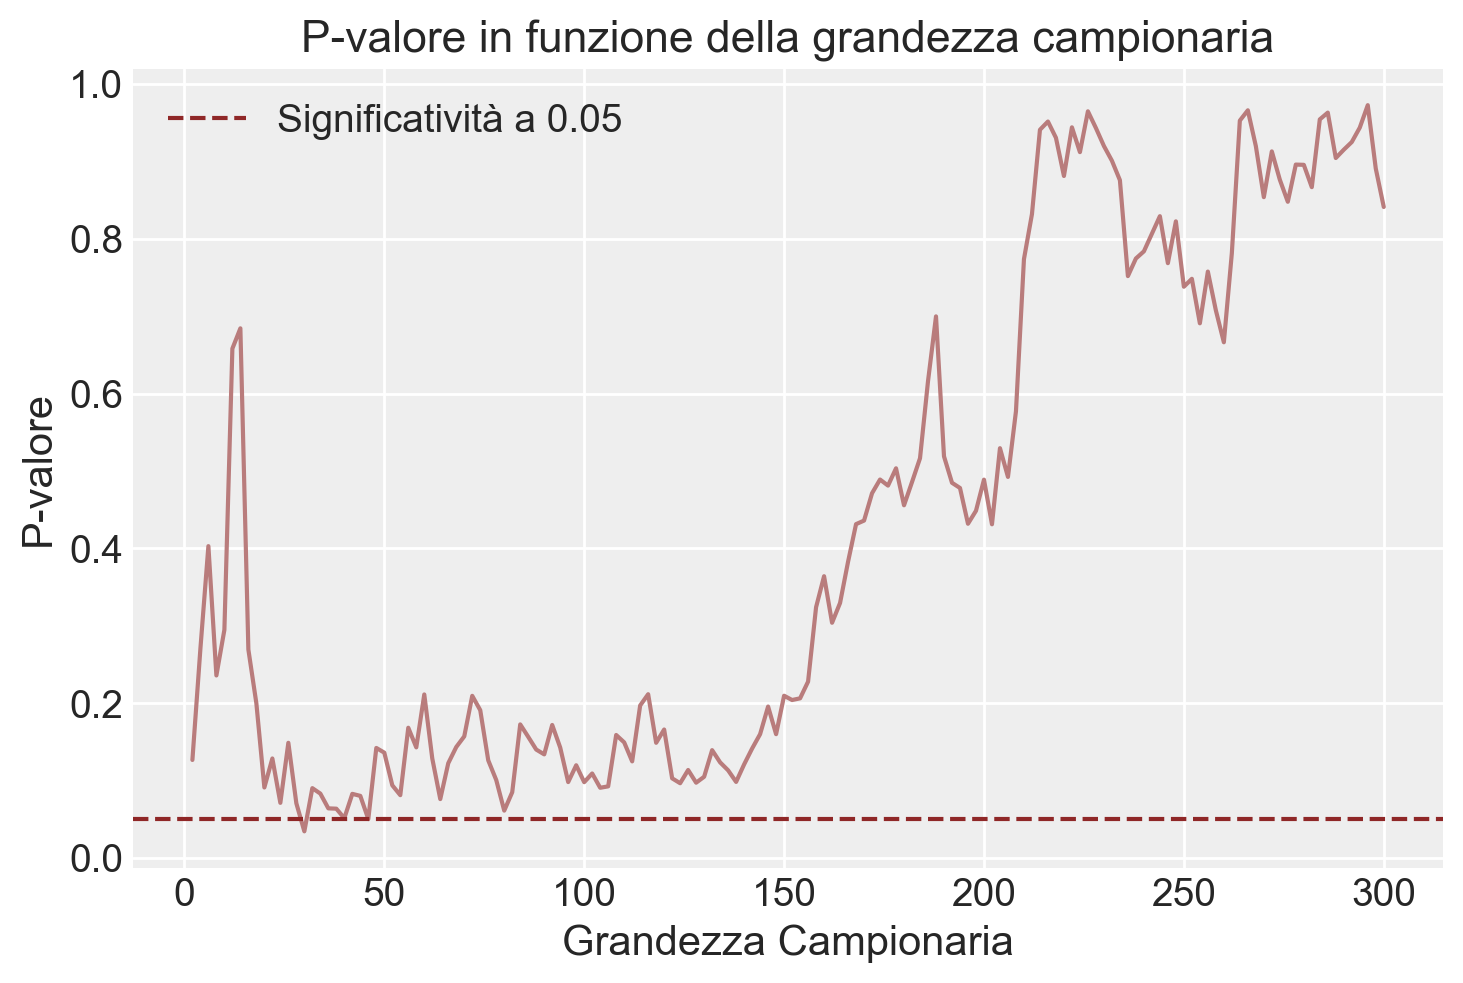

In [38]:
simulate_t_tests(seed=42, max_sample_size=300, mu=0, sigma=2)

La simulazione evidenzia una limitazione fondamentale dell'approccio frequentista: ogni test statistico considera esclusivamente i dati del campione corrente, ignorando le conoscenze accumulate in precedenza. Questa pratica rende il processo decisionale estremamente volatile, poiché, teoricamente, ad ogni nuovo studio si "dimentica" tutta l'informazione derivante dagli studi precedenti.

### Analisi Bayesiana

L'approccio bayesiano offre una soluzione elegante a questo problema. Nel framework bayesiano, la distribuzione a posteriori (cioè, la nostra convinzione aggiornata dopo aver osservato i dati) bilancia sempre l'informazione a priori (ciò che sapevamo prima dell'esperimento) con la verosimiglianza (ciò che i dati ci dicono). Questo equilibrio è particolarmente prezioso quando i dati sono deboli o contengono molto rumore, come nel caso dei dati della simulazione che stiamo discutendo. In tali situazioni, l'informazione a priori assume un ruolo più rilevante, impedendo conclusioni affrettate basate su dati poco informativi.

Per illustrare questa differenza, consideriamo l'analisi bayesiana dei dati simulati in precedenza. Se questi dati vengono analizzati con l'approccio frequentista, forniscono un risultato "statisticamente significativo", suggerendo una differenza tra i due gruppi.

Tuttavia, analizzando gli stessi dati con un approccio bayesiano, otteniamo un intervallo di credibilità al 95% compreso tra -0.52 e 1.12. Poiché questo intervallo include lo zero, possiamo affermare, con un livello di certezza soggettiva del 95%, che non c'è una differenza sostanziale tra le medie delle due popolazioni da cui sono stati estratti i campioni.

Questa discrepanza nei risultati evidenzia un punto cruciale: l'approccio bayesiano è più resistente ai falsi positivi in presenza di dati rumorosi o campioni piccoli. Invece di forzare una decisione binaria (significativo/non significativo) basata su una soglia arbitraria, l'analisi bayesiana fornisce una rappresentazione più sfumata e realistica dell'incertezza associata alle nostre conclusioni.

Inoltre, l'approccio bayesiano offre il vantaggio di essere cumulativo: ogni nuovo studio non parte da zero, ma incorpora naturalmente le conoscenze precedenti attraverso la distribuzione a priori.

In [71]:
np.random.seed(12)
mu=0
sigma=2
max_sample_size=50
full_sample1 = np.random.normal(mu, sigma, max_sample_size)
full_sample2 = np.random.normal(mu, sigma, max_sample_size)

In [81]:
stan_data = {
    "N1": len(full_sample1),
    "N2": len(full_sample2),
    "y1": full_sample1,
    "y2": full_sample2,
}
stan_data

{'N1': 50,
 'N2': 50,
 'y1': array([ 0.94597166, -1.36285176,  0.48487899, -3.40147127,  1.50628567,
        -3.06944268,  0.01025416, -0.24045534, -1.61396376,  5.74363879,
        -1.19564584,  0.94491399,  2.19191224, -2.4303376 ,  2.68471274,
        -0.24429958,  2.02503095, -1.82773829, -2.05906041,  2.4195929 ,
         1.00374461,  0.27769235,  1.28152223,  1.05466533, -2.30872047,
        -4.42666696, -3.36351302, -3.5761885 , -4.43706989, -1.29486156,
        -1.05680864, -0.07841835,  0.4299519 , -0.76871761, -0.50780816,
         0.14650415, -1.99440767, -1.42771258,  0.07083269, -1.35589073,
        -1.14376212, -0.21172463,  2.67166268,  0.63733058, -0.6751905 ,
        -1.17053656, -0.22983988,  4.48363559, -6.29483304,  1.07027179]),
 'y2': array([ 0.46498088,  1.7352239 , -2.29642543,  4.22868848,  2.00188552,
        -0.10282999,  0.3195754 , -1.43252717,  0.10104565, -0.28667483,
         1.88715078,  0.71528845, -0.16689841,  1.35561221,  1.11212075,
         0.4454

In [83]:
stan_file = os.path.join(project_directory, "stan", "two_means_diff.stan")
model = CmdStanModel(stan_file=stan_file)
print(model.code())

13:52:36 - cmdstanpy - INFO - compiling stan file /Users/corradocaudek/_repositories/psicometria/stan/two_means_diff.stan to exe file /Users/corradocaudek/_repositories/psicometria/stan/two_means_diff
13:52:47 - cmdstanpy - INFO - compiled model executable: /Users/corradocaudek/_repositories/psicometria/stan/two_means_diff


data {
  int<lower=0> N1; // Numero di osservazioni nel gruppo 1
  int<lower=0> N2; // Numero di osservazioni nel gruppo 2
  vector[N1] y1; // Dati del gruppo 1
  vector[N2] y2; // Dati del gruppo 2
}
parameters {
  real mu1; // Media del gruppo 1
  real delta; // Differenza tra le medie
  real<lower=0> sigma; // Deviazione standard comune
  real<lower=0> nu; // Gradi di libertà per la distribuzione t
}
transformed parameters {
  real mu2; // Media del gruppo 2
  mu2 = mu1 + delta;
}
model {
  // Priori
  mu1 ~ normal(0, 5);
  delta ~ normal(0, 2); // Priore su delta
  sigma ~ cauchy(0, 5);
  nu ~ gamma(2, 0.1); // Priore sulla t-student
  
  // Verosimiglianza
  y1 ~ student_t(nu, mu1, sigma);
  y2 ~ student_t(nu, mu2, sigma);
}
generated quantities {
  real diff; // Differenza tra le medie (alias di delta per chiarezza)
  diff = delta;
}



In [85]:
fit = model.sample(
    data=stan_data,
    seed=123,
    chains=4,
    iter_sampling=2_000,
    iter_warmup=1_000,
    show_progress=False,
    show_console=False,
)

13:53:34 - cmdstanpy - INFO - CmdStan start processing
13:53:34 - cmdstanpy - INFO - Chain [1] start processing
13:53:34 - cmdstanpy - INFO - Chain [2] start processing
13:53:34 - cmdstanpy - INFO - Chain [3] start processing
13:53:34 - cmdstanpy - INFO - Chain [4] start processing
13:53:34 - cmdstanpy - INFO - Chain [1] done processing
13:53:34 - cmdstanpy - INFO - Chain [2] done processing
13:53:34 - cmdstanpy - INFO - Chain [4] done processing
13:53:34 - cmdstanpy - INFO - Chain [3] done processing
13:53:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'two_means_diff.stan', line 22, column 2 to column 21)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'two_means_diff.stan', line 22, column 2 to column 21)
Consider re-running with show_console=True if the above output is unclear!


In [86]:
az.summary(
    fit,
    var_names=["mu1", "mu2", "delta"],
    round_to=2,
    hdi_prob=0.95
)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu1,-0.43,0.30,-1.03,0.15,0.00,0.0,4961.74,4696.27,1.0
mu2,-0.15,0.30,-0.73,0.42,0.00,0.0,9396.35,6530.40,1.0
delta,0.28,0.42,-0.52,1.12,0.01,0.0,4850.37,5211.27,1.0


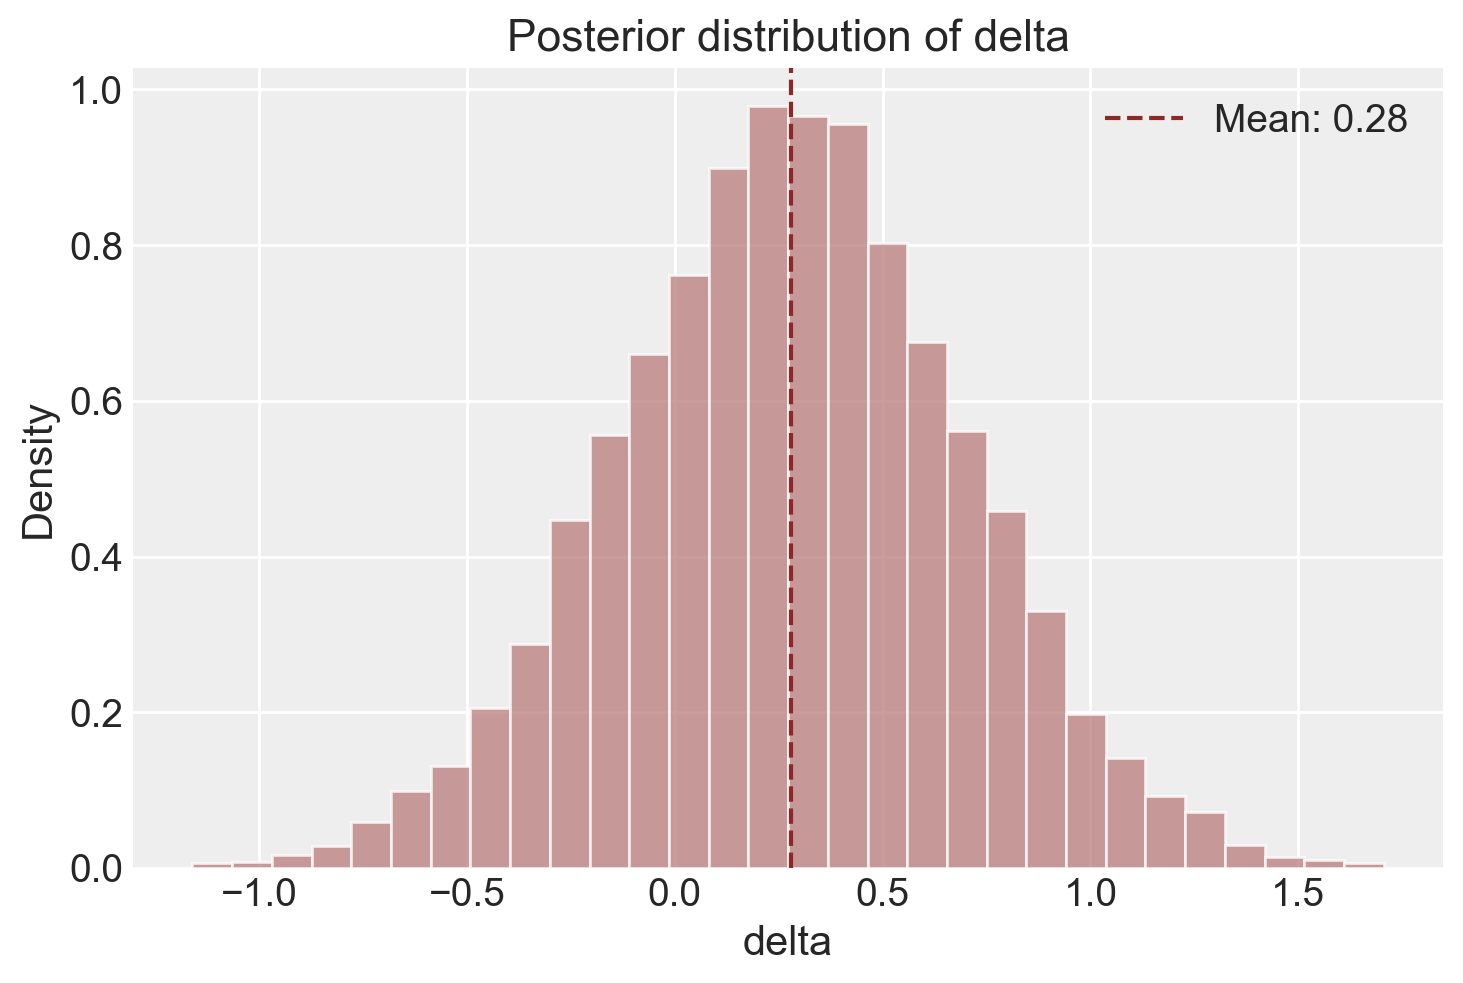

In [87]:
# Estrai i campioni di delta
delta_samples = fit.stan_variable("delta")

# Disegna la distribuzione a posteriori di delta
color_fill = "#b97c7c"
color_edge = "#8f2727"
plt.hist(delta_samples, bins=30, density=True, alpha=0.75, color=color_fill)
plt.axvline(
    np.mean(delta_samples),
    color=color_edge,
    linestyle="--",
    label=f"Mean: {np.mean(delta_samples):.2f}",
)
plt.xlabel("delta")
plt.ylabel("Density")
plt.title("Posterior distribution of delta")
plt.legend()
plt.show()


## Il Giardino dei Sentieri che si Biforcano

Lo psicologo Paul Meehl condusse uno studio su un campione di cinquantasettamila studenti delle scuole superiori del Minnesota, indagando su variabili quali religione, abitudini nel tempo libero, ordine di nascita, numero di fratelli, piani post-diploma e numerosi altri aspetti [@meehl2012summaries]. Complessivamente, le diverse risposte dei partecipanti potevano essere combinate in 990 modi distinti, permettendo analisi del tipo: "Gli studenti appassionati di cucina hanno una maggiore probabilità di essere figli unici?" o "Gli studenti provenienti da famiglie battiste sono più inclini a partecipare a club politici scolastici?". Meehl evidenziò che, analizzando i dati, il 92% di queste possibili combinazioni risultava in correlazioni statisticamente significative. Queste differenze, sebbene reali, presumibilmente derivano da cause multifattoriali e complesse.

Andrew Gelman ha denominato questo fenomeno "Il Giardino dei Sentieri che si Biforcano" [*Garden of Forking Paths*; @gelman2013garden], riferendosi ai molteplici gradi di libertà a disposizione del ricercatore nell'analisi dei dati. Come nell'esempio di Meehl, è possibile esaminare le differenze intergruppo (se questo è l'oggetto di interesse) da molteplici prospettive. Con un campione sufficientemente ampio, alcune di queste differenze risulteranno "statisticamente significative". Ciò indica che, *in quello specifico campione*, quel particolare aspetto dei dati è rilevante. Tuttavia, questa differenza "statisticamente significativa" non sarà necessariamente generalizzabile ad un altro campione, il quale presenterà le proprie idiosincrasie.

In altri termini, come sottolineato da Gelman, l'approccio basato sul test dell'ipotesi nulla si limita a "descrivere il rumore". Da un punto di vista teorico, simili esercizi statistici risultano privi di valore euristico e non contribuiscono in nessun modo all'avanzamento delle conoscenze sul fenomeno oggetto di studio.

In un'ottica di inferenza statistica, questo problema è riconducibile al concetto di "p-hacking" o "data dredging", dove l'esplorazione esaustiva di molteplici ipotesi statistiche su un singolo set di dati può portare a falsi positivi e a una sovrastima della significatività statistica. 

## Garbage In, Garbage Out

La natura della statistica frequentista impone di prendere una decisione dicotomica: o si rifiuta l'ipotesi nulla o non la si rifiuta. Ciò implica che o esiste un effetto reale, oppure non esiste. Con un campione abbastanza grande, è inevitabile trovare qualche effetto, anche se di minima entità.

Un approccio bayesiano, invece, permette di stimare la dimensione dell'effetto e di fornire una distribuzione di probabilità. Una distribuzione di probabilità è una rappresentazione grafica delle diverse possibilità che potrebbero verificarsi. In questo contesto, si tratta della "probabilità inversa", ovvero della plausibilità dell'ipotesi alla luce dei dati osservati e delle conoscenze pregresse. Qui, il parametro $\delta$ rappresenta la differenza tra le due medie ed è il parametro di interesse. Le credenze precedenti su $\delta$ sono espresse tramite una distribuzione a priori: in questo caso, una distribuzione Normale centrata su 0 con una deviazione standard di 2. La distribuzione a posteriori rappresenta la nostra conoscenza aggiornata su $\delta$ dopo l'aggiornamento bayesiano. Il parametro $\delta$ è la nostra *ipotesi* sulla differenza tra le due medie, e l'inferenza bayesiana riguarda il cambiamento della nostra credenza dopo aver osservato i dati.

L'approccio frequentista, al contrario, produce una decisione dicotomica che non modifica la nostra concezione dell'ipotesi dopo aver osservato i dati. Assume una determinata ipotesi come vera e verifica se i dati sono coerenti con essa. Tramite il concetto binario di "significatività statistica", non si modificano le ipotesi di interesse, ma si accettano o si rifiutano le ipotesi nulle.

Sebbene l'approccio frequentista sia spesso considerato "ingenuo" da molti ricercatori, adottare l'approccio bayesiano non rappresenta una soluzione miracolosa ai problemi della scienza contemporanea. Risolve alcuni problemi, ma non altri. In particolare, non affronta la questione degli incentivi accademici che favoriscono la pubblicazione di un elevato numero di articoli, indipendentemente dalla loro qualità. Un principio fondamentale della ricerca è "Garbage in, garbage out". Se i dati derivano da un disegno di ricerca fallace o poco creativo, se la ricerca non ha un solido fondamento teorico capace di avanzare le nostre conoscenze, o se la qualità delle misurazioni è insufficiente, i dati raccolti sono puro rumore. Nessun metodo statistico, nemmeno quello bayesiano, può trasformare la spazzatura in oro.

## Esercizi

::: {#exr-crisis-1}

Esistono numerosi esempi di ricerche che non riescono a essere replicate (posso citare anche uno studio di replicazione che ho condotto io stesso: @caudek2017delta). Un recente caso emblematico è rappresentato dallo studio di @karatacs2023thinking e dal successivo tentativo di replicazione condotto da @moore2024does. Analizzando le quattro principali argomentazioni sollevate da @gelman2024statistical per criticare lo studio di @aungle2023physical, si offra un'interpretazione del perché lo studio di @karatacs2023thinking non sia stato replicato con successo.

:::

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [88]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Mon Jul 29 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.9.1
seaborn   : 0.13.2
pandas    : 2.2.2
numpy     : 1.26.4
arviz     : 0.18.0

Watermark: 2.4.3

